In [1]:
# import the required modules
import commons.graph
import commons.parse
import commons.scores
import warnings
#import pickle

warnings.filterwarnings("ignore")

In [2]:
#create list of allowed and forbidden files
commons.parse.update_allowed_forbidden_files()

40091it [21:39, 30.86it/s]                           


In [2]:
#initialize a GraphMaker to choose a stopword list and a stemmer
gm = commons.graph.GraphMaker('resources/longStopwords.txt','LAN')

In [ ]:
# sample and initialize as many articles as desired 
parsed_articles = commons.parse.parse_and_sample(5000, gm)

In [4]:
# compute all centralities and print the results of your run
run_name = 'testRun'

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 4.29 µs


In [4]:
# Names for centralities : "PR"-> pagerank, "CC" -> closeness, "BC" -> betweenness, "LCC" -> local clustering coefficient
#boolean approximation: 0-> no approx, 1-> yes, approx
commons.scores.centrality_print_scores(parsed_articles, 'BC', 0, run_name)
commons.scores.centrality_print_scores(parsed_articles, 'BC', 1, run_name)

CPU times: user 2min 58s, sys: 6.61 s, total: 3min 5s
Wall time: 4min 32s


In [6]:
commons.scores.centrality_print_scores(parsed_articles, 'PR', 0, run_name)
commons.scores.centrality_print_scores(parsed_articles, 'PR', 1, run_name)

100%|██████████| 4994/4994 [03:21<00:00, 24.79it/s]


In [7]:
commons.scores.centrality_print_scores(parsed_articles, 'LCC', 0, run_name)
commons.scores.centrality_print_scores(parsed_articles, 'LCC', 1, run_name)

100%|██████████| 4994/4994 [04:14<00:00, 19.64it/s]


In [ ]:
commons.scores.centrality_print_scores(parsed_articles, 'CC', 0, run_name)
commons.scores.centrality_print_scores(parsed_articles, 'CC', 1, run_name)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.011     0.000    -0.016    -0.006
 (0 - 2)     -0.012     0.000    -0.017    -0.007
 (0 - 3)     -0.028     0.000    -0.033    -0.023
 (0 - 4)      0.009     0.000     0.004     0.014
 (0 - 5)     -0.007     0.001    -0.012    -0.002
 (0 - 6)     -0.355     0.000    -0.360    -0.350
 (0 - 7)     -0.281     0.000    -0.286    -0.276
 (1 - 0)      0.011     0.000     0.006     0.016
 (1 - 2)     -0.001     0.999    -0.006     0.004
 (1 - 3)     -0.017     0.000    -0.022    -0.012
 (1 - 4)      0.020     0.000     0.015     0.025
 (1 - 5)      0.004     0.171    -0.001     0.009
 (1 - 6)     -0.344     0.000    -0.349    -0.339
 (1 - 7)     -0.269     0.000    -0.275    -0.264
 (2 - 0)      0.012     0.000     0.007     0.017
 (2 - 1)      0.001     0.999    -0.004     0.006
 (2 - 3)     -0.016     0.000    -0.021    -0.011
 (2 - 4)      0.021     0.000   

,PR,approxPR,CC,approxCC,BC,approxBC,LCC,approxLCC
0,0.04929,0.054874,0.055369,0.062235,0.045697,0.053236,0.208275,0.174056


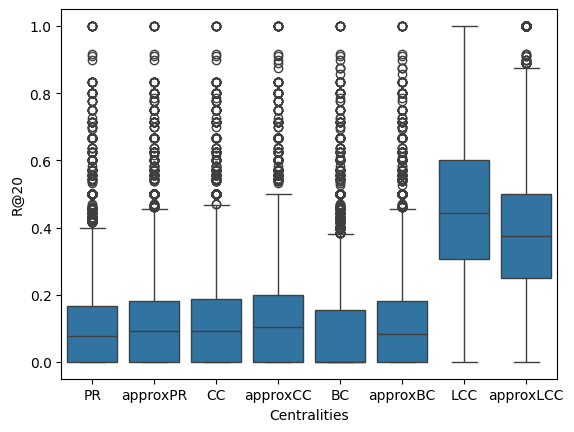

In [3]:
#compute average scores, variances etc...
commons.scores.significant_differences(['PR','CC','BC','LCC'],2,'R@20','half_articles')
display(commons.scores.average_metric('P@20', 'half_articles'))
